In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

from Network.simpleCNN import simpleCNN
from Network.simpleFF import simpleFF

### Load data and models

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Prep the datasets
trainset = datasets.MNIST('MnistData', download=True, train=True, transform=transform)
valset = datasets.MNIST('MnistData', download=True, train=False, transform=transform)

# Feeding for a NN
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [36]:
criterion = nn.NLLLoss()

ff_network = simpleFF(28*28, 64, 32, 10)
ff_optimizer = optim.SGD(ff_network.parameters(), lr=0.003, momentum=0.9)

cnn_network = simpleCNN(9 * 4 * 4, 64, 32, 10)
cnn_optimizer = optim.SGD(cnn_network.parameters(), lr=0.003, momentum=0.9)

### Train a FF network

In [37]:
epochs = 10

train_error = []
valid_error = []

for epoch in range(epochs):
    training_loss= 0
    validation_loss = 0
    for images, labels in trainloader:
        ff_network.train()
        ff_optimizer.zero_grad()
        
        ff_out = ff_network(images.view(images.shape[0], -1))
        loss = criterion(ff_out, labels)
        loss.backward()
        ff_optimizer.step()
        training_loss += loss.item()
        
    for images, labels in valloader:
        ff_network.eval()
        ff_out = ff_network(images.view(images.shape[0], -1))
        loss = criterion(ff_out, labels)
        validation_loss += loss.item()
    
    train_error.append(training_loss)
    valid_error.append(validation_loss)
    print("\rEpoch {} train loss {} validation loss {}".format(epoch+1, training_loss, validation_loss), end="")
    


Epoch 10 train loss 94.37896613031626 validation loss 17.598387390375137

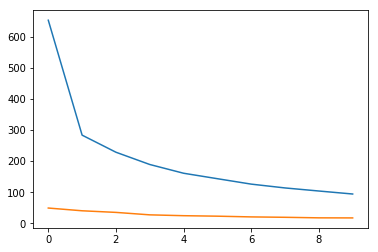

In [38]:
plt.figure()
plt.plot(train_error)
plt.plot(valid_error)
plt.show()

In [50]:
torch.save(ff_network.state_dict(), "Network/ff_network")

### Train a CNN

In [52]:
epochs = 10

train_error = []
valid_error = []

for epoch in range(epochs):
    training_loss= 0
    validation_loss = 0
    for images, labels in trainloader:
        cnn_network.train()
        cnn_optimizer.zero_grad()
        
        cnn_out = cnn_network(images)
        loss = criterion(cnn_out, labels)
        loss.backward()
        cnn_optimizer.step()
        training_loss += loss.item()
        
    for images, labels in valloader:
        cnn_network.eval()
        cnn_out = cnn_network(images)
        loss = criterion(cnn_out, labels)
        validation_loss += loss.item()
    
    train_error.append(training_loss)
    valid_error.append(validation_loss)
    print("\rEpoch {} train loss {} validation loss {}".format(epoch+1, training_loss, validation_loss), end="")
    


Epoch 10 train loss 38.338099632412195 validation loss 6.529189169406891

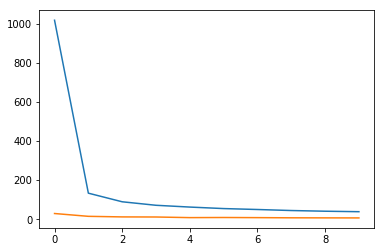

In [53]:
plt.figure()
plt.plot(train_error)
plt.plot(valid_error)
plt.show()

In [54]:
torch.save(cnn_network.state_dict(), "Network/cnn_network")